# Árbol de decisón para especies de flores

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../datasets/iris/iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.shape

(150, 5)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

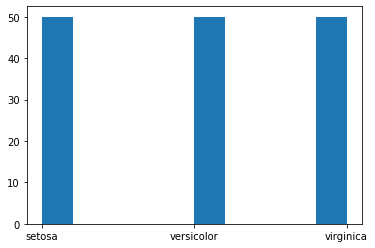

In [4]:
plt.hist(data.Species)

In [5]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]

In [7]:
import numpy as np

In [8]:
data["is_train"] = np.random.uniform(0, 1, len(data))<=0.75

<ipython-input-9-b50e5899244f>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.hist(data["is_train"].astype(np.int))


(array([ 41.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 109.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

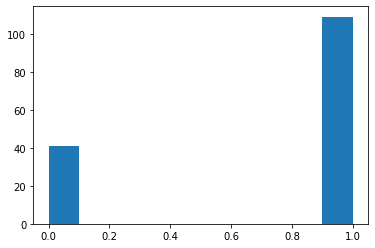

In [9]:
plt.hist(data["is_train"].astype(np.int))

In [10]:
train, test = data[data["is_train"]==True], data[data["is_train"]==False]

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(criterion='entropy', min_samples_split=20,
                       random_state=99)

In [13]:
preds = tree.predict(test[predictors])

In [14]:
pd.crosstab(test[target], preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,17,0,0
versicolor,0,11,2
virginica,0,1,10


## Visualización del árbol de decisión

In [15]:
from sklearn.tree import export_graphviz

In [16]:
with open("C:/Users/Jhon/Documents/Python Scripts/python-ml/notebooks/resources/iris_dtree.dot", "w") as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

In [17]:
import os
from graphviz import Source

In [18]:
file = open("C:/Users/Jhon/Documents/Python Scripts/python-ml/notebooks/resources/iris_dtree.dot", "r")
text = file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="Petal.Length <= 2.35\\nentropy = 1.582\\nsamples = 109\\nvalue = [33, 37, 39]"] ;\n1 [label="entropy = 0.0\\nsamples = 33\\nvalue = [33, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Width <= 1.75\\nentropy = 1.0\\nsamples = 76\\nvalue = [0, 37, 39]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Petal.Length <= 5.05\\nentropy = 0.384\\nsamples = 40\\nvalue = [0, 37, 3]"] ;\n2 -> 3 ;\n4 [label="Sepal.Length <= 5.0\\nentropy = 0.176\\nsamples = 38\\nvalue = [0, 37, 1]"] ;\n3 -> 4 ;\n5 [label="entropy = 1.0\\nsamples = 2\\nvalue = [0, 1, 1]"] ;\n4 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 36\\nvalue = [0, 36, 0]"] ;\n4 -> 6 ;\n7 [label="entropy = 0.0\\nsamples = 2\\nvalue = [0, 0, 2]"] ;\n3 -> 7 ;\n8 [label="entropy = 0.0\\nsamples = 36\\nvalue = [0, 0, 36]"] ;\n2 -> 8 ;\n}'

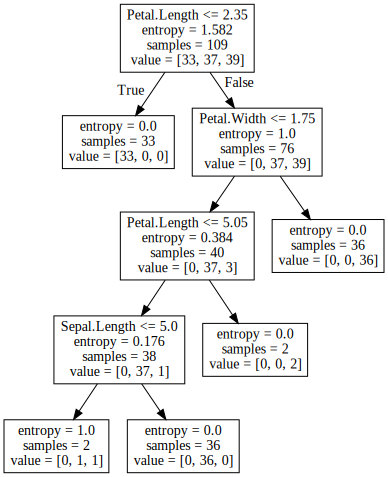

In [19]:
Source(text)

## Cross Validation para la poda

In [23]:
X = data[predictors]
Y = data[target]

In [24]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=20, random_state=99)
tree.fit(X, Y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20,
                       random_state=99)

In [26]:
from sklearn.model_selection import KFold

In [28]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)
cv.get_n_splits(X)

10

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer

In [30]:
scores = cross_val_score(tree, X, Y, scoring=make_scorer(accuracy_score), cv = cv, n_jobs=1)
scores

array([1.        , 0.93333333, 0.93333333, 0.93333333, 1.        ,
       0.93333333, 1.        , 0.86666667, 0.93333333, 0.8       ])

In [31]:
score = np.mean(scores)
score

0.9333333333333333

In [32]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X,Y)
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    cv.get_n_splits(X)
    scores = cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=-1)
    score = np.mean(scores)
    print("Score para i = ",i," es de ", score)
    print("   ",tree.feature_importances_)

Score para i =  1  es de  0.5666666666666667
    [0. 0. 1. 0.]
Score para i =  2  es de  0.9200000000000002
    [0.         0.         0.66620285 0.33379715]
Score para i =  3  es de  0.9400000000000001
    [0.         0.         0.68976981 0.31023019]
Score para i =  4  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  5  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  6  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  7  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  8  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  9  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  10  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]


In [33]:
predictors

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']